# Amazon Product Success Score Prediction with AutoGluon

이 노트북에서는 Amazon Sales 데이터를 사용하여 제품의 성공 점수(Success Score)를 예측하는 모델을 구축합니다.
AutoGluon AutoML 프레임워크를 사용합니다.

## 목차
1. 환경 설정 및 라이브러리 임포트
2. 데이터 로드 및 전처리 (Data Loading & Cleaning)
3. 특성 엔지니어링 (Feature Engineering)
4. 데이터 분석 및 시각화 (EDA)
5. 모델링 (AutoGluon TabularPredictor)
6. 모델 평가 및 분석

In [ ]:
# 필요 라이브러리 설치
!pip install autogluon pandas numpy matplotlib seaborn scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor

# 한글 폰트 설정 (Windows 환경, 필요시 변경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

c:\Users\COM\miniconda3\envs\DS\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


product_id : 제품 ID

product_name : 제품명

category : 제품 카테고리

discounted_price : 제품의 할인된 가격

actual_price : 제품의 실제 가격

discount_percentage : 제품 할인율 %

rating : 제품 평점 

rating_count : 아마존 평점에 투표한 사람 수 

about_product	 : 제품 설명

user_id	: 제품에 대한 리뷰를 작성한 사용자의 ID

user_name	: 제품에 대한 리뷰를 작성한 사용자의 이름

review_id : 사용자 리뷰의 ID 

review_title : 리뷰 제목

review_content	: 리뷰 내용

img_link : 제품 이미지 링크

product_link : 제품 링크

## 2. 데이터 로드 및 전처리

In [5]:
# 데이터 로드
df = pd.read_csv('amazon.csv')

# 데이터 확인
display(df.head())
print(df.info())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [159]:
import pandas as pd

# 텍스트 출력 제한을 해제 (None은 무제한을 의미합니다)
pd.set_option('display.max_colwidth', None)


In [6]:
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('₹', '').replace(',', ''))
    return x

def clean_percentage(x):
    if isinstance(x, str):
        return float(x.replace('%', '')) / 100
    return x

# 가격 및 할인율 정제
df['discounted_price'] = df['discounted_price'].apply(clean_currency)
df['actual_price'] = df['actual_price'].apply(clean_currency)
df['discount_percentage'] = df['discount_percentage'].apply(clean_percentage)

# Rating Count 정제 (쉼표 제거)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
# 결측치나 이상한 값 처리 (예: 데이터가 없는 경우 0으로 처리하거나 제외)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0)

# Rating 정제 (문자열이 섞여있을 수 있음)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Rating 결측치는 평균으로 대체하거나 제거 (여기선 제거)
df = df.dropna(subset=['rating', 'rating_count', 'discounted_price', 'actual_price'])

print("전처리 후 데이터 정보:")
print(df.info())

전처리 후 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1464 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non

In [8]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,3126.011906,5447.002923,0.477131,4.096585,18282.366803
std,6946.625442,10878.270001,0.216274,0.291674,42742.207636
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,323.750000,800.000000,0.320000,4.000000,1179.000000
50%,799.000000,1650.000000,0.500000,4.100000,5178.500000
75%,1999.000000,4303.750000,0.630000,4.300000,17330.750000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [10]:
# 브랜드 구분하기

# 1. 첫 두 단어를 합친 컬럼 만들기
def get_first_two_words(name):
    words = name.split()
    return " ".join(words[:2]) if len(words) >= 2 else words[0]

df['two_words'] = df['product_name'].apply(get_first_two_words)

# 2. 빈도수 확인 (어떤 조합이 많이 나오는지 보세요!)
top_combinations = df['two_words'].value_counts().head(20)
print("상위 브랜드 조합:\n", top_combinations)

상위 브랜드 조합:
 two_words
Amazon Basics          21
Portronics Konnect     19
Samsung Galaxy         19
Noise ColorFit         15
Gizga Essentials       12
Boult Audio            11
Ambrane Unbreakable    11
AmazonBasics USB       11
Redmi Note             10
Fire-Boltt Ninja       10
Wayona Nylon           10
pTron Solero           10
boAt Wave               9
SanDisk Ultra           9
iQOO Z6                 9
7SEVEN® Compatible      8
boAt Bassheads          7
Ambrane 60W             7
boAt Rockerz            7
Duracell USB            6
Name: count, dtype: int64


In [13]:
def finalize_brand_v2(text):
    # 1. 앞뒤 공백 제거 및 소문자로 통일 (이게 핵심!)
    clean_text = str(text).strip()
    lower_text = clean_text.lower()
    
    # 2. 'amazon'이 포함되어 있으면 무조건 'Amazon'으로 통합
    if 'amazon' in lower_text:
        return 'Amazon'
    
    # 3. 그 외 주요 브랜드 통합
    mapping = {
        'samsung galaxy': 'Samsung',
        'boat wave': 'boAt',
        'boat rockerz': 'boAt',
        'boat bassheads': 'boAt',
        'pigeon by': 'Pigeon',
        'ambrane unbreakable': 'Ambrane',
        'wayona nylon': 'Wayona'
    }
    
    if lower_text in mapping:
        return mapping[lower_text]
    
    # 4. 나머지는 첫 단어만 추출하되 깔끔하게 반환
    return clean_text.split()[0]

# 컬럼 업데이트
df['brand_final'] = df['two_words'].apply(finalize_brand_v2)

# 잘 바뀌었는지 상위 10개 출력해서 확인
print(df['brand_final'].value_counts().head(10))

brand_final
boAt          67
Amazon        63
Samsung       36
Portronics    31
Ambrane       29
Bajaj         26
Fire-Boltt    26
Redmi         26
Wayona        24
Noise         24
Name: count, dtype: int64


In [16]:
#img_link, product_link 열 삭제

df.drop(columns=['img_link', 'product_link'], inplace=True)

In [18]:
# Category 분리 : `|` 기준으로 Main, Sub Category 생성
# 예: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
df['category_split'] = df['category'].str.split('|')
df['main_category'] = df['category_split'].str[0]
df['sub_category'] = df['category_split'].str[-1] # 가장 세부 카테고리

In [21]:
# 1. 삭제하고 싶은 카테고리 목록 만들기 (오타 주의!)
exclude_categories = [
    'MusicalInstruments', 
    'OfficeProducts', 
    'HomeImprovement', 
    'Toys&Games', 
    'Car&Motorbike', 
    'Health&PersonalCare'
]

# 2. 해당 카테고리가 '포함되지 않은' 데이터만 다시 저장하기
# df['sub_category'].isin(exclude_categories) 는 삭제할 대상들을 찾는 코드이고,
# 앞의 ~ 표시가 "그것들을 제외해라"라는 뜻입니다.
df = df[~df['main_category'].isin(exclude_categories)].copy()

# 3. 결과 확인 (제대로 삭제되었는지 개수 확인)
print("삭제 후 남은 데이터 개수:", len(df))
print("남은 소분류 목록:", df['sub_category'].unique())

삭제 후 남은 데이터 개수: 1426
남은 소분류 목록: ['USBCables' 'WirelessUSBAdapters' 'HDMICables' 'SmartTelevisions'
 'RemoteControls' 'StandardTelevisions' 'TVWall&CeilingMounts' 'RCACables'
 'Mounts' 'OpticalCables' 'Projectors' 'Adapters' 'SatelliteReceivers'
 'DVICables' 'SpeakerCables' 'StreamingClients' 'AVReceivers&Amplifiers'
 'TowerSpeakers' '3DGlasses' 'SmartWatches' 'PowerBanks' 'Smartphones'
 'MicroSD' 'BasicMobiles' 'In-Ear' 'AutomobileChargers' 'Cradles'
 'WallChargers' 'OTGAdapters' 'Tripods' 'SelfieSticks' 'Stands'
 'CableConnectionProtectors' 'Décor' 'ScreenProtectors' 'StylusPens'
 'Bedstand&DeskMounts' 'BasicCases' 'HandlebarMounts' 'On-Ear'
 'CameraPrivacyCovers' 'PhoneCharms' 'Shower&WallMounts' 'PenDrives'
 'Mice' 'GraphicTablets' 'Lapdesks' 'NotebookComputerStands' 'Keyboards'
 'DisposableBatteries' 'Tape' 'Keyboard&MouseSets' 'ExternalHardDisks'
 'VideoCameras' 'Tabletop&TravelTripods' 'Repeaters&Extenders'
 'TripodLegs' 'InkjetInkCartridges' 'DustCovers' 'GamingMice' 'Paints'
 '

In [23]:
# **Success Score 정의**: `Rating * log10(Rating_Count + 1)
# Success Score 계산
# 로그를 취해 Rating Count의 스케일을 조정하고 Rating과 곱함
df['success_score'] = df['rating'] * np.log10(df['rating_count'] + 1)

display(df[['product_name', 'main_category', 'sub_category', 'rating', 'rating_count', 'success_score']].head())

,product_name,main_category,sub_category,rating,rating_count,success_score
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,USBCables,4.2,24269.0,18.417293
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,USBCables,4.0,43994.0,18.573613
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,USBCables,3.9,7928.0,15.206952
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,4.2,94363.0,20.894187
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,USBCables,4.2,16905.0,17.757772


In [24]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,two_words,brand_final,category_split,main_category,sub_category,success_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Wayona Nylon,Wayona,"[Computers&Accessories, Accessories&Peripheral...",Computers&Accessories,USBCables,18.417293
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Ambrane Unbreakable,Ambrane,"[Computers&Accessories, Accessories&Peripheral...",Computers&Accessories,USBCables,18.573613
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Sounce Fast,Sounce,"[Computers&Accessories, Accessories&Peripheral...",Computers&Accessories,USBCables,15.206952
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",boAt Deuce,boAt,"[Computers&Accessories, Accessories&Peripheral...",Computers&Accessories,USBCables,20.894187
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Portronics Konnect,Portronics,"[Computers&Accessories, Accessories&Peripheral...",Computers&Accessories,USBCables,17.757772


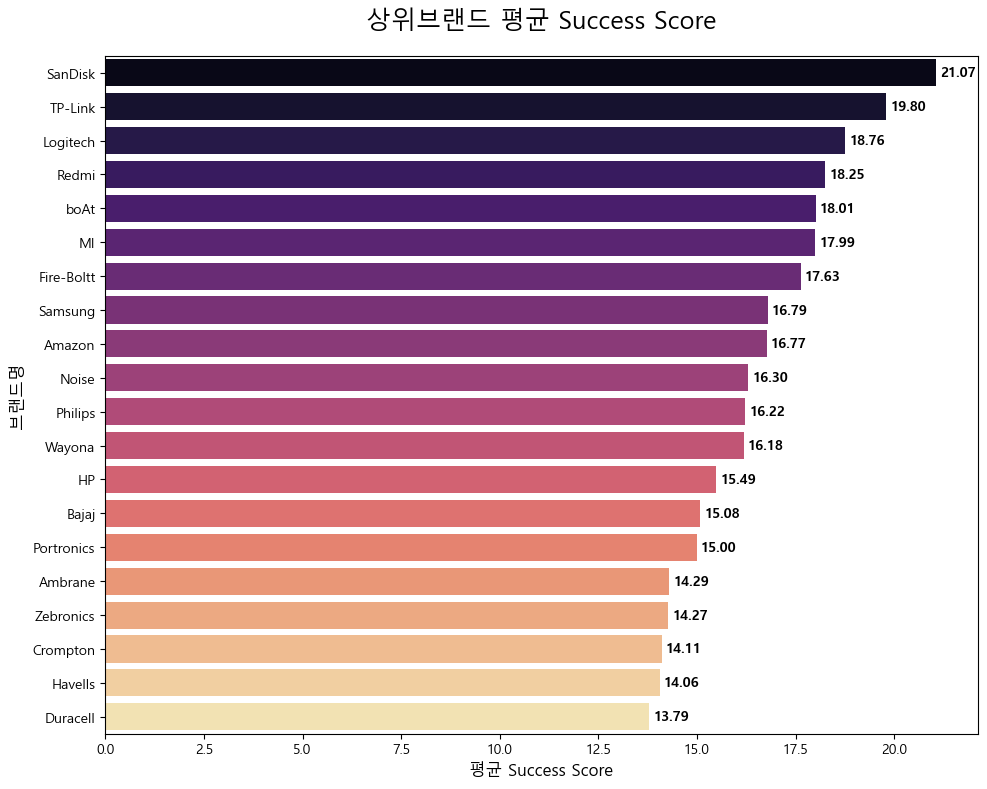

In [30]:
plt.figure(figsize=(10, 8))

# 1. 데이터 준비 (기존 코드와 동일)
brand_counts = df['brand_final'].value_counts()
major_brands = brand_counts[brand_counts >= 15].index
brand_analysis = df[df['brand_final'].isin(major_brands)].groupby('brand_final')['success_score'].mean().sort_values(ascending=False)

# 2. 그래프 그리기
ax = sns.barplot(x=brand_analysis.values, y=brand_analysis.index, palette='magma')

# --- 3. 데이터 레이블(숫자) 추가 부분 ---
for i, v in enumerate(brand_analysis.values):
    # x축 값(v) 옆에 텍스트를 표시 (v + 0.1 정도로 여백 부여)
    ax.text(v + 0.1, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)
# --------------------------------------

plt.title('상위브랜드 평균 Success Score', fontsize=18, pad=20)
plt.xlabel('평균 Success Score', fontsize=12)
plt.ylabel('브랜드명', fontsize=12)

plt.tight_layout()
plt.show()

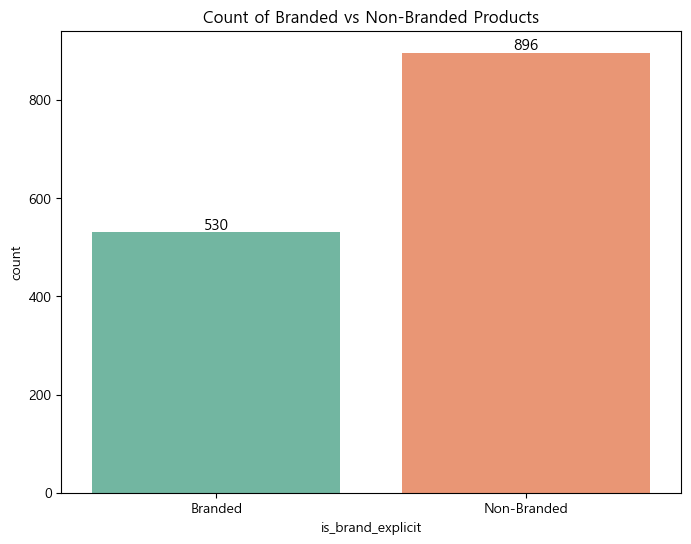

In [35]:
# 브랜드 유무를 판단하는 기준 생성 (아까 만든 brand_final 활용)
# 빈도가 낮은 브랜드나 'Others'로 분류된 것들을 'No Brand'로 그룹화
major_brand_list = df['brand_final'].value_counts()[df['brand_final'].value_counts() >= 15].index

df['is_brand_explicit'] = df['brand_final'].apply(lambda x: 'Branded' if x in major_brand_list and x != 'Others' else 'Non-Branded')

plt.figure(figsize=(8, 6))
# countplot은 데이터의 개수를 자동으로 세서 막대로 그려줍니다.
ax = sns.countplot(x='is_brand_explicit', data=df, palette='Set2')

# 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Branded vs Non-Branded Products')
plt.show()

In [38]:
# 서브카테고리별 브랜드 유무에 따른 success_score 비교
comparison = df.groupby(['sub_category', 'is_brand_explicit'])['success_score'].mean().unstack()

# 차이가 큰 순서대로 보기
comparison['diff'] = comparison['Branded'] - comparison['Non-Branded']
print(comparison.sort_values(by='diff', ascending=False).tail(20))

is_brand_explicit             Branded  Non-Branded  diff
sub_category                                            
Tabletop&TravelTripods            NaN    18.403490   NaN
Tablets                           NaN    15.918055   NaN
Tape                              NaN    16.261616   NaN
TonerCartridges                   NaN    13.957012   NaN
TowerSpeakers                     NaN     9.316788   NaN
TraditionalLaptops                NaN    10.042180   NaN
TripodLegs                        NaN    16.474859   NaN
Tripods                           NaN    15.830070   NaN
USBtoUSBAdapters                  NaN    14.214741   NaN
UninterruptedPowerSupplies        NaN    16.373047   NaN
VacuumSealers                     NaN    10.194065   NaN
VideoCameras                13.052231          NaN   NaN
WaffleMakers&Irons                NaN    10.141423   NaN
WaterCartridges                   NaN    15.413716   NaN
WaterFilters&Purifiers            NaN    13.885943   NaN
WaterPurifierAccessories       

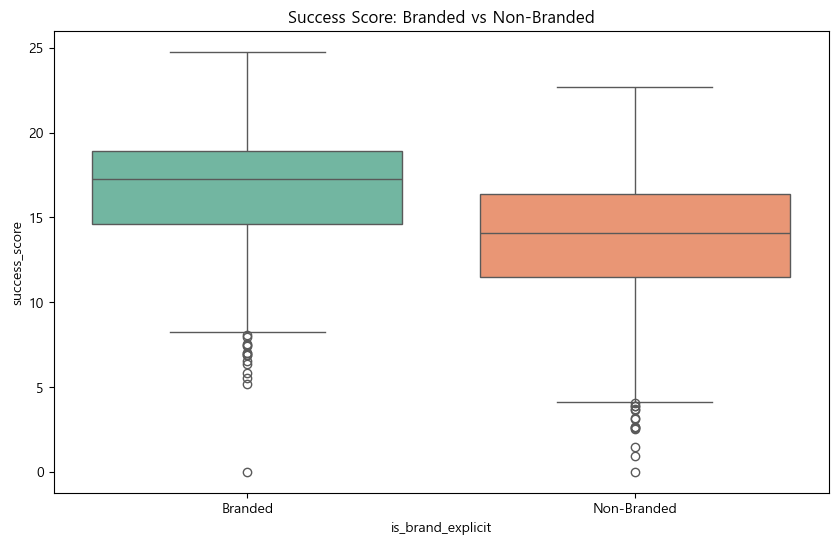

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_brand_explicit', y='success_score', data=df, palette='Set2')
plt.title('Success Score: Branded vs Non-Branded')
plt.show()

In [40]:
# 1. Branded 그룹만 필터링
branded_df = df[df['is_brand_explicit'] == 'Branded']

# 2. 하위 10% 또는 특정 점수(예: 5점) 이하인 제품 추출
# (그래프 상에서 하단 점들이 위치한 구간을 타겟팅합니다)
failures = branded_df[branded_df['success_score'] < 7].sort_values(by='success_score')

# 3. 주요 컬럼 확인 (제품명, 가격, 평점, 할인율 등)
print(f"Branded 실패 제품 수: {len(failures)}개")
failures[['brand_final', 'product_name', 'actual_price', 'rating', 'rating_count', 'discount_percentage', 'success_score','review_content']].head(10)

Branded 실패 제품 수: 10개


,brand_final,product_name,actual_price,rating,rating_count,discount_percentage,success_score,review_content
282,Amazon,Amazon Brand - Solimo 65W Fast Charging Braide...,999.0,3.0,0.0,0.80,0.000000,I have a pd supported car charger and I bought...
575,Amazon,Amazon Basics 2 Amp USB Wall Charger & Micro U...,499.0,4.4,14.0,0.56,5.174802,Product works well and charges the devices in ...
487,Noise,Noise ColorFit Pro 4 Alpha Bluetooth Calling S...,7999.0,3.5,37.0,0.44,5.529243,Sometimes tap to wake up screen work. Little b...
1237,Havells,Havells Bero Quartz Heater Black 800w 2 Heat S...,2545.0,4.1,25.0,0.04,5.801391,"Like and happy,,Please don't buy this heater, ..."
1089,Amazon,Amazon Basics 2000/1000 Watt Room Heater with ...,1699.0,3.1,111.0,0.38,6.352576,"It's working,Good,Good Product 👍,Nice product,..."
277,Amazon,Amazon Brand - Solimo 3A Fast Charging Tough T...,299.0,3.8,51.0,0.60,6.520813,",Please don't buy this product.Cable stopped w..."
163,Ambrane,Ambrane BCL-15 Lightning Cable for Smartphone ...,399.0,3.9,57.0,0.63,6.877369,"Good one….,Very good sturdy,I am using this in..."
775,Amazon,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,1000.0,5.0,23.0,0.50,6.901056,I really like this wireless mouse it has becam...
195,Zebronics,Zebronics CU3100V Fast charging Type C cable w...,549.0,3.9,61.0,0.75,6.990328,"After 1-2 months , it has become worse and my ..."
234,Zebronics,Zebronics CU3100V Fast charging Type C cable w...,549.0,3.9,61.0,0.77,6.990328,"After 1-2 months , it has become worse and my ..."


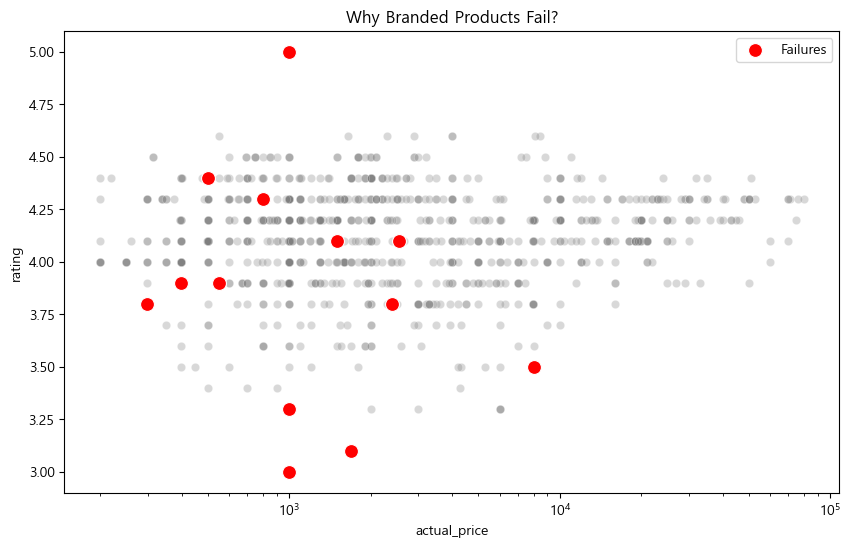

In [161]:
plt.figure(figsize=(10, 6))
# 전체 Branded 제품은 흐리게
sns.scatterplot(data=branded_df, x='actual_price', y='rating', alpha=0.3, color='gray')
# 실패한 제품만 붉은색으로 강조
sns.scatterplot(data=failures, x='actual_price', y='rating', color='red', s=100, label='Failures')

plt.title('Why Branded Products Fail?')
plt.xscale('log') # 가격 편차가 크면 로그 스케일 권장
plt.show()

## 4. 데이터 분석 및 시각화 (EDA)
1. 카테고리별 상품 수
2. 주요 수치형 변수 분포
3. 상관관계 분석

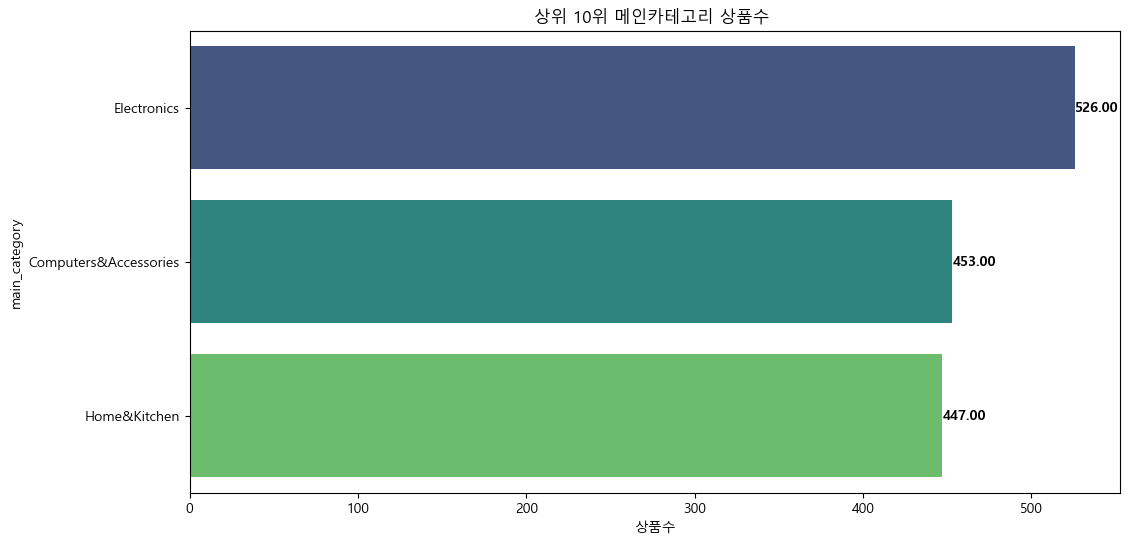

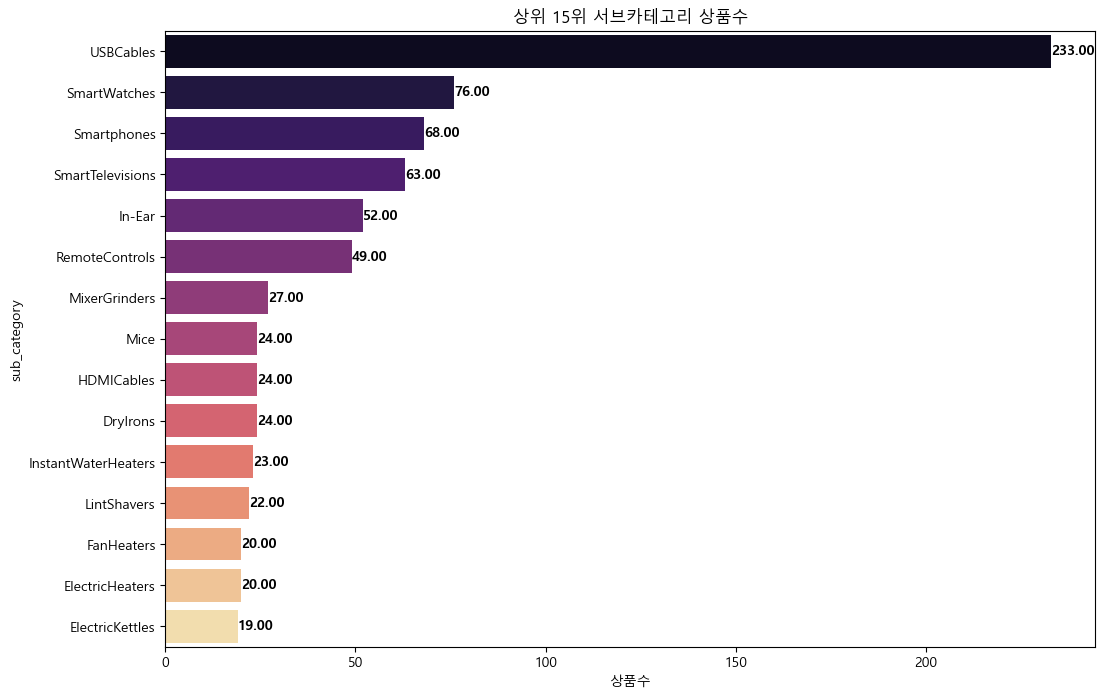

In [55]:
# 1. 카테고리별 상품 수 시각화
plt.figure(figsize=(12, 6))
top_main_cats = df['main_category'].value_counts().head(10)
ax1=sns.barplot(x=top_main_cats.values, y=top_main_cats.index, palette='viridis')

for i, v in enumerate(top_main_cats.values):
    # x축 값(v) 옆에 텍스트를 표시 (
    ax1.text(v, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)
    
plt.title('상위 10위 메인카테고리 상품수 ')
plt.xlabel('상품수')
plt.show()

plt.figure(figsize=(12, 8))
top_sub_cats = df['sub_category'].value_counts().head(15)
ax2=sns.barplot(x=top_sub_cats.values, y=top_sub_cats.index, palette='magma')

for i, v in enumerate(top_sub_cats.values):
    # x축 값(v) 옆에 텍스트를 표시
    ax2.text(v, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)

plt.title('상위 15위 서브카테고리 상품수')
plt.xlabel('상품수')
plt.show()

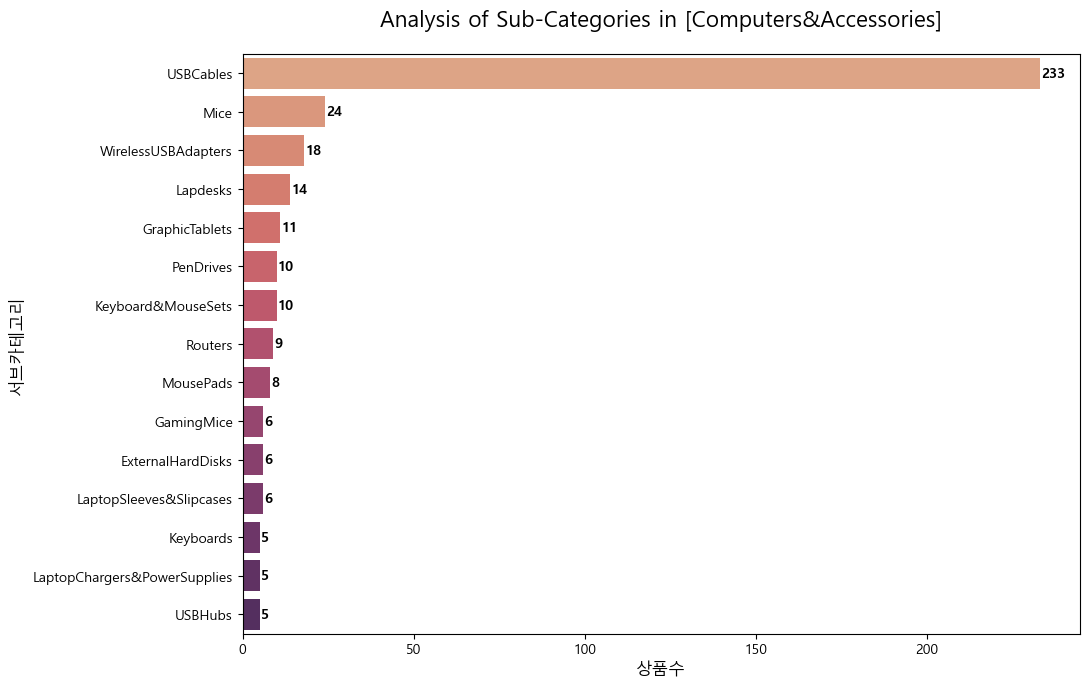

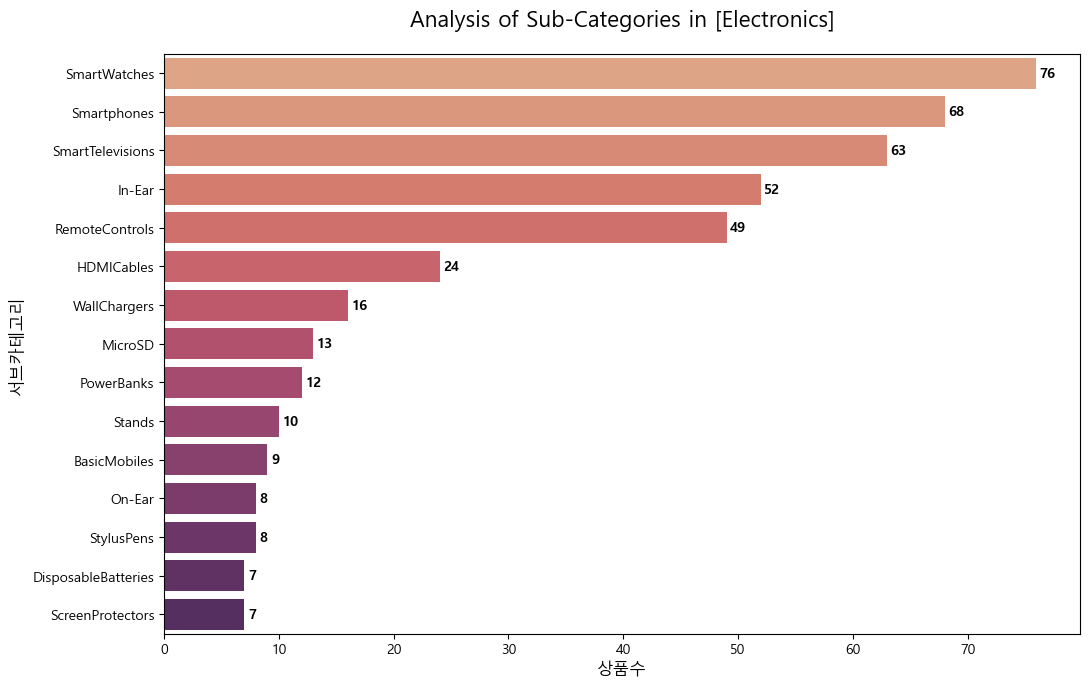

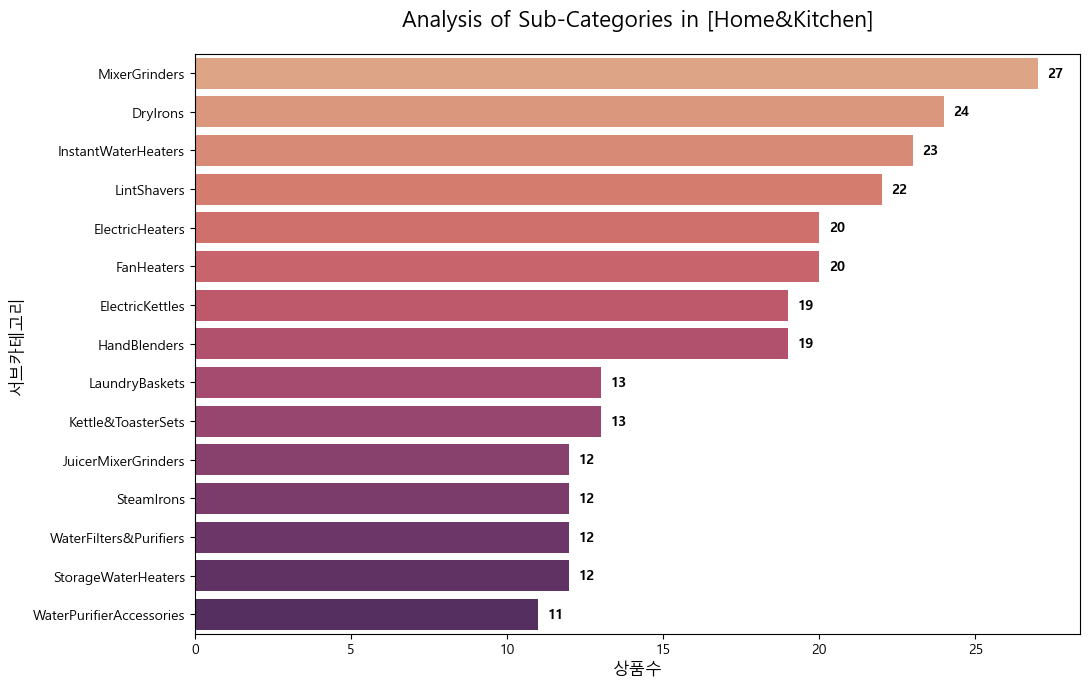

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 메인 카테고리 리스트 추출
main_categories = df['main_category'].unique()

# 3. 반복문으로 그래프 그리기
for cat in main_categories:
    temp_df = df[df['main_category'] == cat]
    sub_counts = temp_df['sub_category'].value_counts().head(15) # 너무 많으면 복잡하니 상위 15개만
    
    if sub_counts.empty: continue # 데이터가 없으면 건너뜀

    plt.figure(figsize=(11, 7))
    
    # 그래프 그리기
    ax = sns.barplot(x=sub_counts.values, y=sub_counts.index, palette='flare')
    
    # --- 숫자 레이블 추가하는 부분 ---
    for i, v in enumerate(sub_counts.values):
        # x축 값(v) 옆에 텍스트를 적습니다.
        ax.text(v + 0.3, i, str(v), color='black', va='center', fontweight='bold')
    # ------------------------------

    plt.title(f'Analysis of Sub-Categories in [{cat}]', fontsize=16, pad=20)
    plt.xlabel('상품수', fontsize=12)
    plt.ylabel('서브카테고리', fontsize=12)
    
    # 여백 자동 조정 및 출력
    plt.tight_layout()
    plt.show()

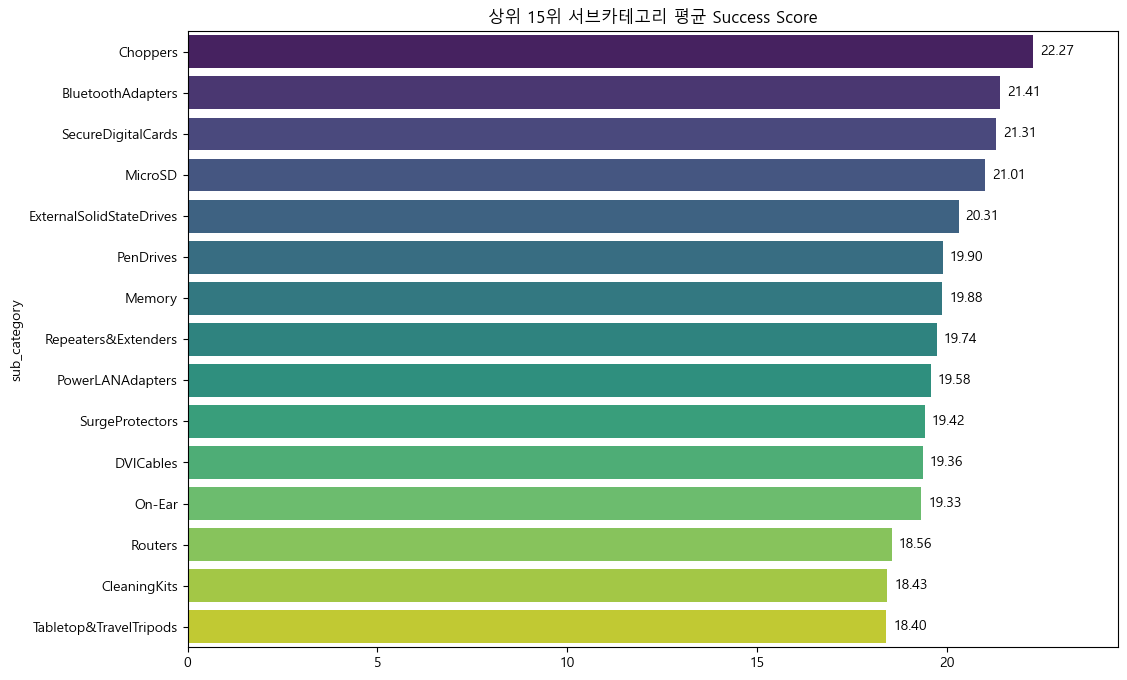

In [75]:
plt.figure(figsize=(12, 8))
sub_score_mean = df.groupby('sub_category')['success_score'].mean().sort_values(ascending=False).head(15)

# 1. 그래프 그리기
ax = sns.barplot(x=sub_score_mean.values, y=sub_score_mean.index, palette='viridis', hue=sub_score_mean.index, legend=False)

# 2. 모든 컨테이너(막대 그룹)를 돌면서 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

plt.title('상위 15위 서브카테고리 평균 Success Score')
plt.xlim(0, max(sub_score_mean.values) * 1.1) # 오른쪽 여백 확보

plt.show()

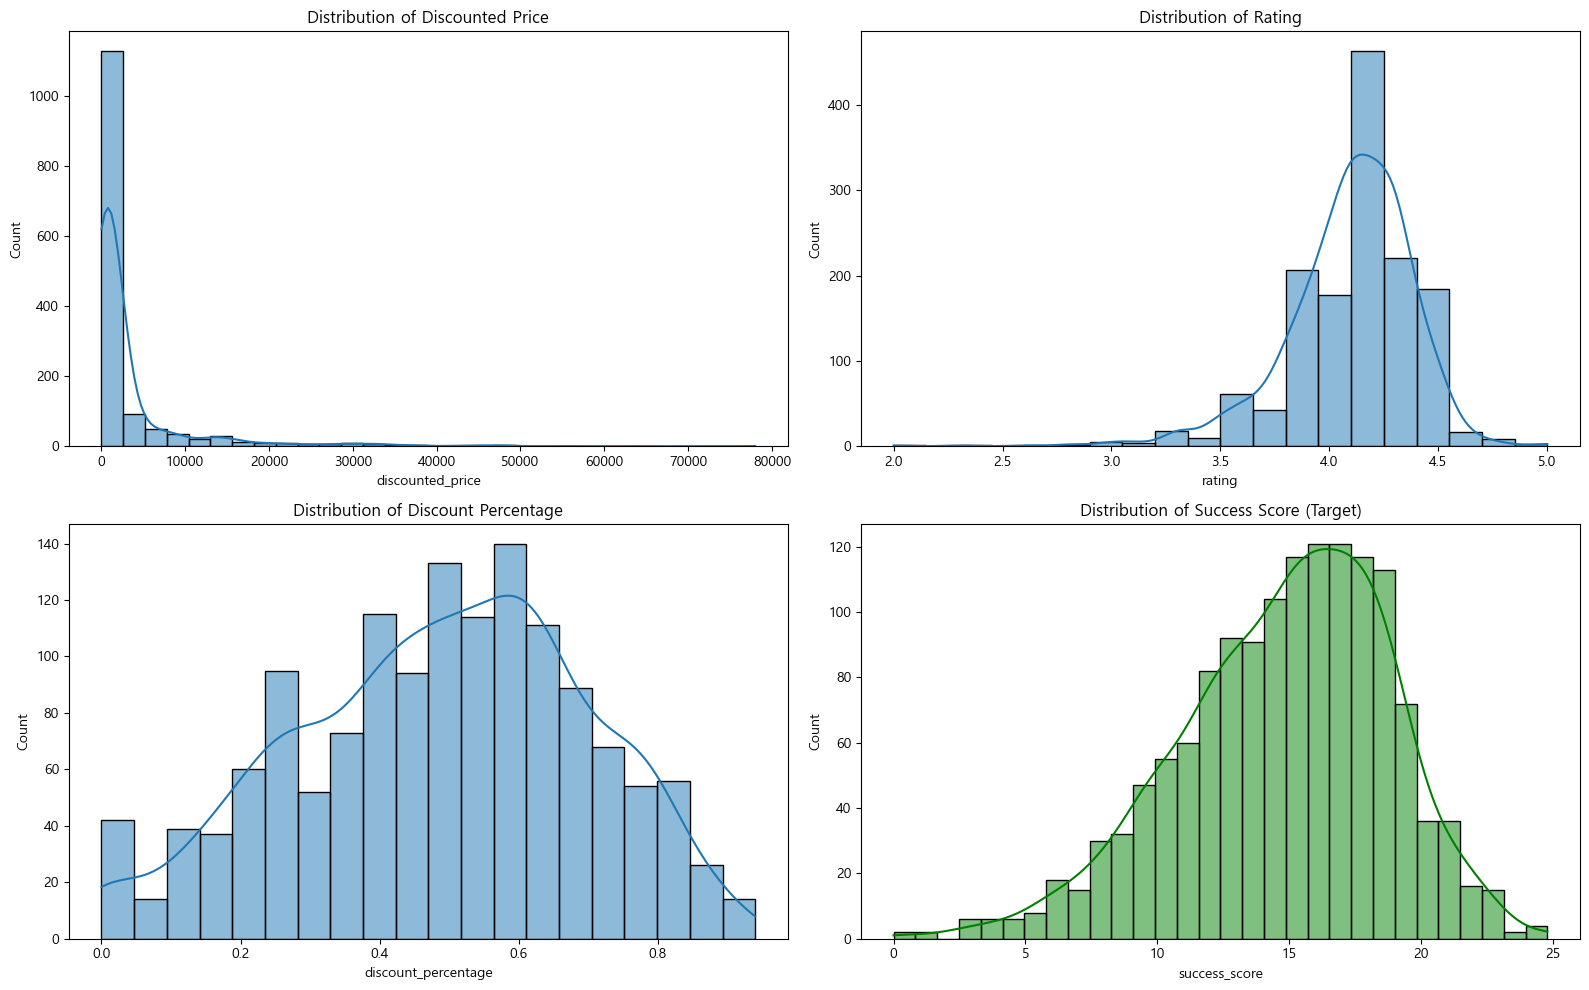

In [58]:
# 2. 수치형 변수 분포 및 Success Score 분포
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Discounted Price')

sns.histplot(df['rating'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rating')

sns.histplot(df['discount_percentage'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Discount Percentage')

sns.histplot(df['success_score'], bins=30, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Success Score (Target)')

plt.tight_layout()
plt.show()

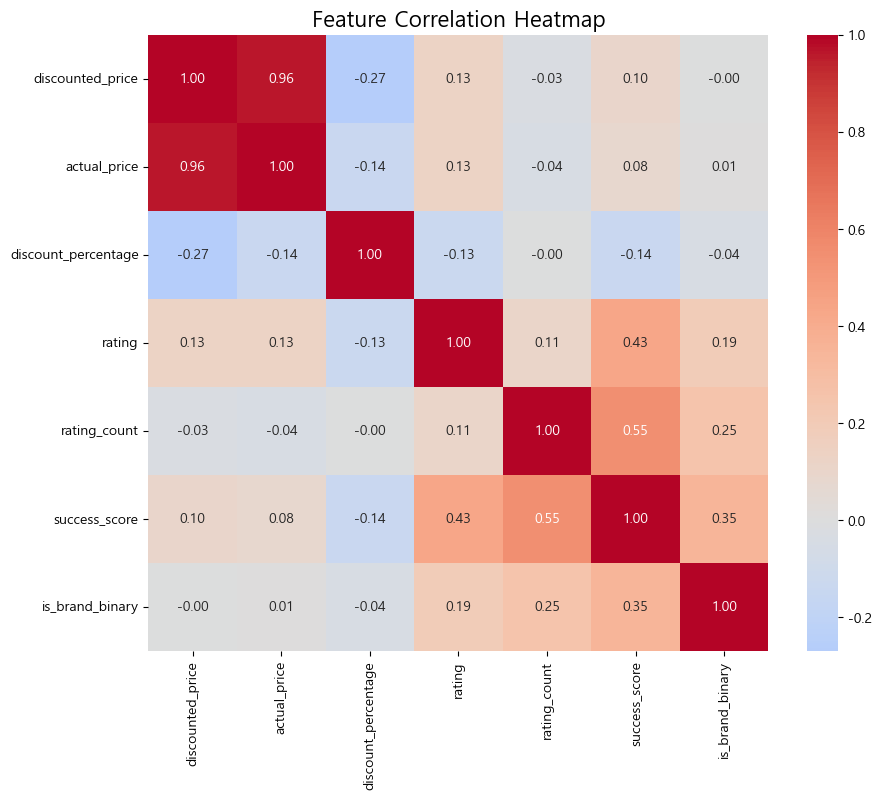

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 브랜드 유무를 숫자로 변환 (Branded: 1, Non-Branded: 0)
df['is_brand_binary'] = df['is_brand_explicit'].map({'Branded': 1, 'Non-Branded': 0})

# 2. 히트맵에 포함할 숫자형 컬럼 선택
# 수치형 데이터(float64)와 새로 만든 바이너리 변수만 추출합니다.
numeric_cols = [
    'discounted_price', 'actual_price', 'discount_percentage', 
    'rating', 'rating_count', 'success_score', 'is_brand_binary'
]

# 3. 상관계수 계산
corr_matrix = df[numeric_cols].corr()

# 4. 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

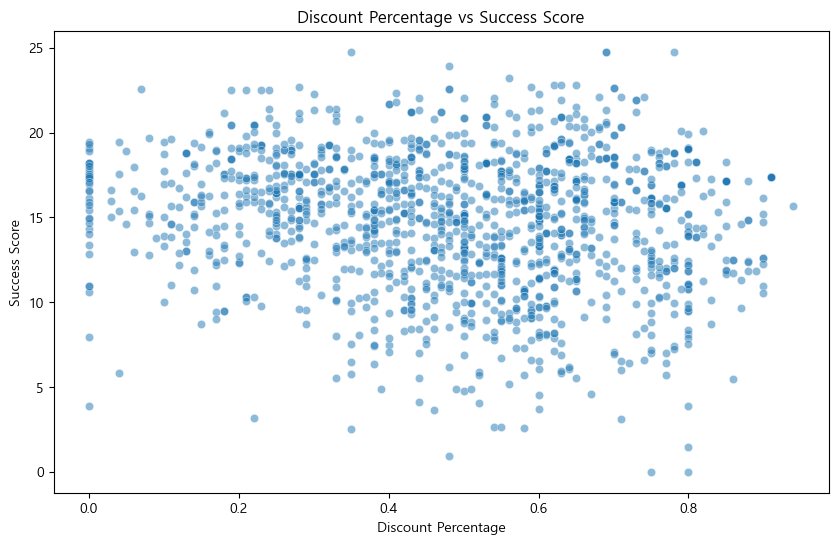

In [73]:
# 4. 가성비(할인율) vs 시장반응(Success Score) 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_percentage', y='success_score', alpha=0.5)
plt.title('Discount Percentage vs Success Score')
plt.xlabel('Discount Percentage')
plt.ylabel('Success Score')
plt.show()

## 5. c

In [76]:
from sklearn.model_selection import train_test_split

# 1. 학습에 사용할 최종 컬럼들만 선택 (텍스트 덩어리 및 ID 제외)
features = [
    'main_category', 'sub_category', 'brand_final', 
    'discounted_price', 'actual_price', 'discount_percentage', 
    'rating', 'rating_count', 'is_brand_explicit', 'success_score'
]

# 2. 데이터 분할
# test_size=0.2는 20%를 테스트용으로 떼어놓겠다는 뜻입니다.
train_data, test_data = train_test_split(df[features], test_size=0.2, random_state=42)

print(f"학습용 데이터: {len(train_data)}개")
print(f"테스트용 데이터: {len(test_data)}개")

학습용 데이터: 1140개
테스트용 데이터: 286개


In [77]:
from autogluon.tabular import TabularPredictor

# 1. 정답(Target) 컬럼 지정
label = 'success_score'

# 2. 모델 학습 (시간 제한이나 품질 옵션을 조절할 수 있습니다)
# 'best_quality'는 성능을 최우선으로 하며, 시간이 부족하다면 'medium_quality'를 사용하세요.
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets='best_quality',
    time_limit=600 # 최대 10분 동안 학습
)

No path specified. Models will be saved in: "AutogluonModels\ag-20260203_015132"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          6
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       18.96 GB / 31.94 GB (59.4%)
Disk Space Avail:   28.02 GB / 465.13 GB (6.0%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	Th

(_ray_fit pid=35672) [1000]	valid_set's rmse: 0.302308
(_ray_fit pid=35628) [5000]	valid_set's rmse: 0.313776 [repeated 20x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=35608) [8000]	valid_set's rmse: 0.628468 [repeated 13x across cluster]
(_ray_fit pid=36260) [7000]	valid_set's rmse: 0.401393 [repeated 11x across cluster]
(_ray_fit pid=36260) [10000]	valid_set's rmse: 0.39128 [repeated 3x across cluster]


(_dystack pid=8868) 	-0.4114	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	24.0s	 = Training   runtime
(_dystack pid=8868) 	1.43s	 = Validation runtime
(_dystack pid=8868) Fitting model: LightGBM_BAG_L1 ... Training model for up to 55.14s of the 100.19s of remaining time.
(_dystack pid=8868) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (6 workers, per: cpus=1, gpus=0, memory=0.10%)


(_ray_fit pid=11572) [1000]	valid_set's rmse: 0.341214
(_ray_fit pid=10980) [1000]	valid_set's rmse: 0.295048


(_dystack pid=8868) 	-0.3053	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	14.43s	 = Training   runtime
(_dystack pid=8868) 	0.12s	 = Validation runtime
(_dystack pid=8868) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 34.03s of the 79.08s of remaining time.
(_dystack pid=8868) 	Fitting 1 model on all data (use_child_oof=True) | Fitting with cpus=6, gpus=0
(_dystack pid=8868) 	-0.2492	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	0.9s	 = Training   runtime
(_dystack pid=8868) 	0.14s	 = Validation runtime
(_dystack pid=8868) Fitting model: CatBoost_BAG_L1 ... Training model for up to 32.92s of the 77.96s of remaining time.
(_dystack pid=8868) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (6 workers, per: cpus=1, gpus=0, memory=2.20%)
(_ray_fit pid=3724) 	Ran out of time, early stopping on iteration 167.
(_ray_fit pid=37348) 	Ran out of time, early stopping on iteration 276. [repe

(_ray_fit pid=33296) [1000]	valid_set's rmse: 0.212073 [repeated 4x across cluster]


(_dystack pid=8868) 	-0.37	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	8.42s	 = Training   runtime
(_dystack pid=8868) 	0.12s	 = Validation runtime
(_dystack pid=8868) Fitting model: LightGBM_BAG_L2 ... Training model for up to 27.71s of the 27.57s of remaining time.
(_dystack pid=8868) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (6 workers, per: cpus=1, gpus=0, memory=0.10%)
(_ray_fit pid=37324) 	Ran out of time, early stopping on iteration 270.


(_ray_fit pid=16536) [1000]	valid_set's rmse: 0.386468 [repeated 8x across cluster]


(_dystack pid=8868) 	-0.301	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	7.89s	 = Training   runtime
(_dystack pid=8868) 	0.11s	 = Validation runtime
(_dystack pid=8868) Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 14.11s of the 13.97s of remaining time.
(_dystack pid=8868) 	Fitting 1 model on all data (use_child_oof=True) | Fitting with cpus=6, gpus=0
(_dystack pid=8868) 	-0.223	 = Validation score   (-root_mean_squared_error)
(_dystack pid=8868) 	0.75s	 = Training   runtime
(_dystack pid=8868) 	0.14s	 = Validation runtime
(_dystack pid=8868) Fitting model: CatBoost_BAG_L2 ... Training model for up to 13.15s of the 13.01s of remaining time.
(_dystack pid=8868) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (6 workers, per: cpus=1, gpus=0, memory=2.23%)
(_ray_fit pid=5144) 	Ran out of time, early stopping on iteration 63.
(_ray_fit pid=37032) 	Ran out of time, early stopping on iteration 95. [repeated

## 6. 모델 평가 및 분석

In [78]:
# 1. 테스트 데이터에서 정답을 제외한 뒤 예측 수행
y_test = test_data[label]
test_data_nolabel = test_data.drop(columns=[label])

# 2. 예측 및 평가
performance = predictor.evaluate(test_data)
print("모델 성능 평가 결과:", performance)

# 3. 어떤 모델이 가장 우수했는지 순위 확인 (Leaderboard)
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

모델 성능 평가 결과: {'root_mean_squared_error': np.float64(-0.18204136212146568), 'mean_squared_error': -0.033139057523038605, 'mean_absolute_error': -0.06999926244282331, 'r2': 0.9978577250275785, 'pearsonr': 0.9990055029634044, 'median_absolute_error': -0.02963670852341238}
                     model  score_test  score_val              eval_metric  \
0          CatBoost_BAG_L1   -0.091781  -0.246096  root_mean_squared_error   
1          CatBoost_BAG_L2   -0.124219  -0.230065  root_mean_squared_error   
2   RandomForestMSE_BAG_L2   -0.178456  -0.159125  root_mean_squared_error   
3      WeightedEnsemble_L3   -0.182041  -0.158206  root_mean_squared_error   
4      WeightedEnsemble_L2   -0.190419  -0.181200  root_mean_squared_error   
5     ExtraTreesMSE_BAG_L2   -0.194088  -0.167710  root_mean_squared_error   
6          LightGBM_BAG_L2   -0.219747  -0.259763  root_mean_squared_error   
7   NeuralNetFastAI_BAG_L2   -0.222397  -0.405288  root_mean_squared_error   
8           XGBoost_BAG_L1  

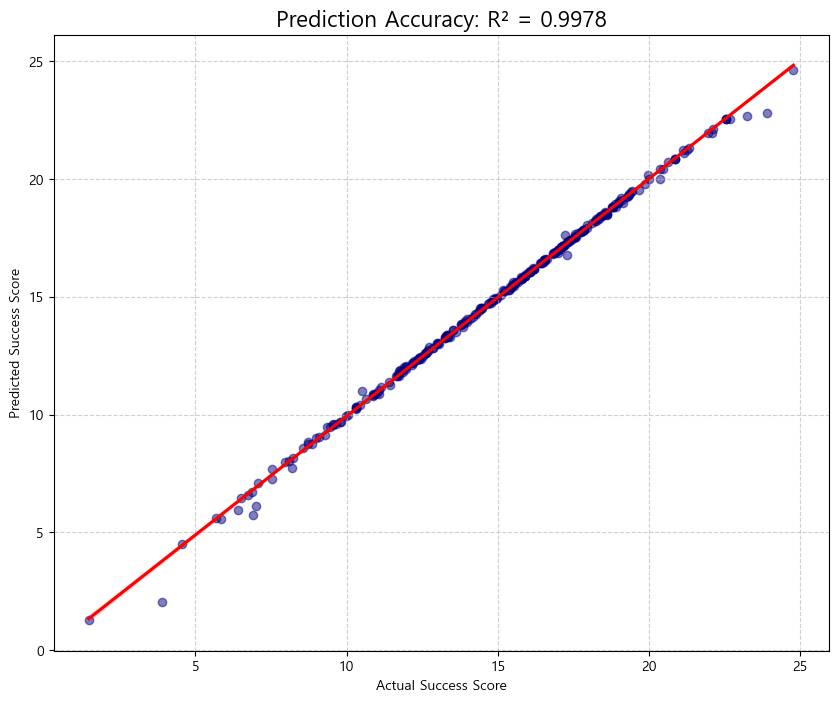

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = predictor.predict(test_data)
y_true = test_data['success_score']

plt.figure(figsize=(10, 8))
# 실제값과 예측값 시각화
sns.regplot(x=y_true, y=y_pred, scatter_kws={'alpha':0.5, 'color':'navy'}, line_kws={'color':'red'})

plt.title(f'Prediction Accuracy: R² = {0.9978}', fontsize=16)
plt.xlabel('Actual Success Score')
plt.ylabel('Predicted Success Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Computing feature importance via permutation shuffling for 9 features using 286 rows with 5 shuffle sets...
	123.8s	= Expected runtime (24.76s per shuffle set)
	33.8s	= Actual runtime (Completed 5 of 5 shuffle sets)


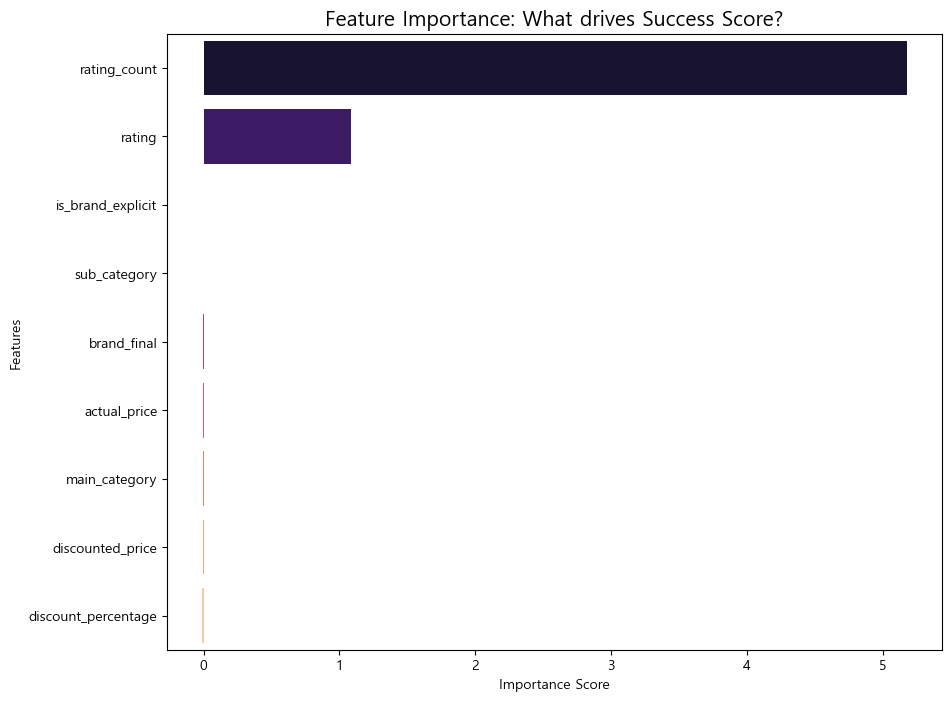

In [80]:
# 변수 중요도 계산
importance = predictor.feature_importance(test_data)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance['importance'], y=importance.index, palette='magma')

plt.title('Feature Importance: What drives Success Score?', fontsize=15)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

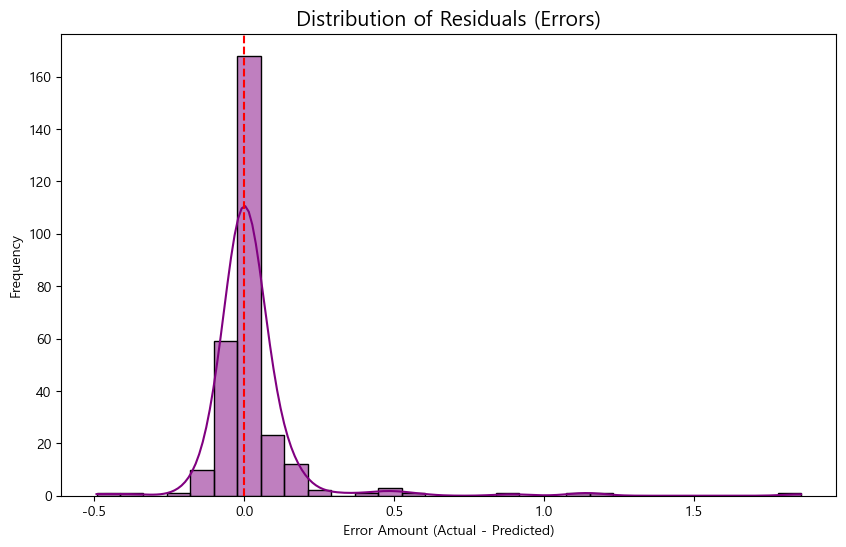

In [81]:
residuals = y_true - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)

plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Errors)', fontsize=15)
plt.xlabel('Error Amount (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()